In [1]:
using PyPlot, PyCall
using Distributions

In [2]:
W = [1.0, 0.0, 1.0]
σ = 0.5
N = 20
X = range(-0.4, 2.4, length=N)
Y = [W[1] + W[2]*x + W[3]*x^2 + σ*randn() for x in X]
X_min = minimum(X)
X_max = maximum(X)

2.4

# single regression

$$
y = ax + b
$$

In [3]:
X_all = range(X_min, X_max, length=100)
W1 = sum(Y .* X) / sum(X .^ 2)
Y1 = [W1*x for x in X_all]

100-element Array{Float64,1}:
 -1.0017364808953364 
 -0.9309066287108176 
 -0.8600767765262989 
 -0.7892469243417801 
 -0.7184170721572615 
 -0.6475872199727427 
 -0.576757367788224  
 -0.5059275156037052 
 -0.43509766341918654
 -0.3642678112346677 
 -0.293437959050149  
 -0.22260810686563032
 -0.15177825468111159
  ⋮                  
  5.231290511342312  
  5.30212036352683   
  5.37295021571135   
  5.443780067895868  
  5.514609920080387  
  5.585439772264906  
  5.656269624449425  
  5.727099476633944  
  5.797929328818461  
  5.86875918100298   
  5.9395890331875    
  6.010418885372018  

# multiple regression

$$
y = ax_0 + ax_1 + \cdots  + ax_N
$$

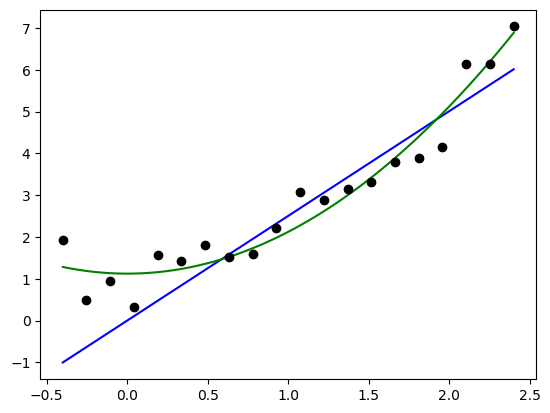

In [4]:
X2 = zeros(3, N)
X2[1, :] .= 1
X2[2, :] = X
X2[3, :] = X.^2
W2 = inv(X2*X2')*X2*Y
Y2 = [W2[1] + W[2]*x + W[3]*x^2 for x in X_all]
figure()
plot(X_all, Y1, "b-")
plot(X_all, Y2, "g-")
plot(X, Y, "ko")
show()